In [1]:
import sys
sys.path.append('../')
from utility.file_utility import FileUtility
import pandas as pd
from pandas import Series
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [4]:
phenotypes_best_features={'Tobramycin_S-vs-R':'genexp##gpa##roary', 'Ceftazidim_S-vs-R':'genexp##snps##gpa##roary', 'Ciprofloxacin_S-vs-R':'snps##gpa##roary', 'Meropenem_S-vs-R':'genexp##gpa##roary'}


In [7]:
result_files=FileUtility.recursive_glob('/mounts/data/proj/asgari/Pseudogenomics/classifications/','*genexp##gpa##roary_*.pickle')

In [23]:
for file in result_files[0:1]:
    classifier=file.split('_')[-1].replace('.pickle','')
    cv=file.split('_CV_')[-1].split('_')[0]
    feature=file.split('/')[-1].split('_')[0]
    phenotype=file.split('/')[0:-1][-1]
    fold_files=FileUtility.recursive_glob('/'.join(file.split('/')[0:-1])+'/cv/','*.txt')
    fold_files.sort()
    [label_set, conf, label_set, best_score_, best_estimator_,
                              cv_results_, best_params_,  (cv_predictions_pred,cv_predictions_trues,isolates), (Y_test_pred, Y_test) ]=FileUtility.load_obj(file)
    
    print (classifier)
    print (feature)
    print (cv)
    print (phenotype)
    print (fold_files[0])
    print (fold_files[1])
    print (files)

SVM
genexp##gpa##roary
tree
Ciprofloxacin_S-vs-R
/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Ciprofloxacin_S-vs-R/cv/tree/Ciprofloxacin_S-vs-R_S_vs_R_tree_cv_folds.txt
/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Ciprofloxacin_S-vs-R/cv/tree/Ciprofloxacin_S-vs-R_S_vs_R_tree_cv_test.txt
['/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Ciprofloxacin_S-vs-R/cv/tree/Ciprofloxacin_S-vs-R_S_vs_R_tree_cv_test.txt', '/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Ciprofloxacin_S-vs-R/cv/tree/Ciprofloxacin_S-vs-R_S_vs_R_tree_cv_folds.txt']


/mounts/Users/student/asgari/.local/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [29]:
a=list(cv_results_.keys())
a.sort()
for x in a:
    print(x)

mean_fit_time
mean_score_time
mean_test_accuracy
mean_test_f1_macro
mean_test_f1_micro
mean_test_precision_macro
mean_test_precision_micro
mean_test_recall_macro
mean_test_recall_micro
mean_test_scores_f1_0
mean_test_scores_f1_1
mean_test_scores_p_0
mean_test_scores_p_1
mean_test_scores_r_0
mean_test_scores_r_1
mean_train_accuracy
mean_train_f1_macro
mean_train_f1_micro
mean_train_precision_macro
mean_train_precision_micro
mean_train_recall_macro
mean_train_recall_micro
mean_train_scores_f1_0
mean_train_scores_f1_1
mean_train_scores_p_0
mean_train_scores_p_1
mean_train_scores_r_0
mean_train_scores_r_1
param_C
param_class_weight
param_dual
param_fit_intercept
param_loss
param_penalty
param_tol
params
rank_test_accuracy
rank_test_f1_macro
rank_test_f1_micro
rank_test_precision_macro
rank_test_precision_micro
rank_test_recall_macro
rank_test_recall_micro
rank_test_scores_f1_0
rank_test_scores_f1_1
rank_test_scores_p_0
rank_test_scores_p_1
rank_test_scores_r_0
rank_test_scores_r_1
split0_t

In [41]:
cv_results_['mean_test_f1_macro'][np.argmax(cv_results_['mean_test_f1_macro'])]

0.7851830036814846

In [42]:
cv_results_['std_test_f1_macro'][np.argmax(cv_results_['mean_test_f1_macro'])]

0.10501179459931614

In [2]:
sheets={'CV std Test':'valiation std cv','CV std Cross-val':'cross-val std cv','CV tree Test':'valiation block cv','CV tree Cross-val':'cross-val block cv'}
features=['snps','snps##gpa##roary','genexp##snps##gpa##roary','genexp##gpa##roary','gpa##roary','genexp##snps','genexp']

feature_map={'snps##gpa##roary':'snps-gpa','genexp##snps##gpa##roary':'snps-gpa-genexp','genexp##gpa##roary':'gpa-genexp','gpa##roary':'gpa','genexp##snps':'genexp-snps'}
cls='RF'
phenotypes=['Tobramycin_S-vs-R', 'Ceftazidim_S-vs-R', 'Ciprofloxacin_S-vs-R', 'Meropenem_S-vs-R']
phenotypes.sort()


In [8]:
result_files

['/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Ciprofloxacin_S-vs-R/genexp##gpa##roary_CV_tree_SVM.pickle',
 '/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Ciprofloxacin_S-vs-R/genexp##gpa##roary_CV_tree_RF.pickle',
 '/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Ciprofloxacin_S-vs-R/genexp##gpa##roary_CV_tree_LR.pickle',
 '/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Meropenem_S-vs-R/genexp##gpa##roary_CV_tree_SVM.pickle',
 '/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Meropenem_S-vs-R/genexp##gpa##roary_CV_tree_RF.pickle',
 '/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Meropenem_S-vs-R/genexp##gpa##roary_CV_tree_LR.pickle',
 '/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Tobramycin_S-vs-R/genexp##gpa##roary_CV_tree_SVM.pickle',
 '/mounts/data/proj/asgari/Pseudogenomics/classifications/S_vs_R_tree_cv/Tobramyc

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="State", y="Rates.Property.All",
              data=state_crime_four_states, 
              hue='old_new', dodge=True);

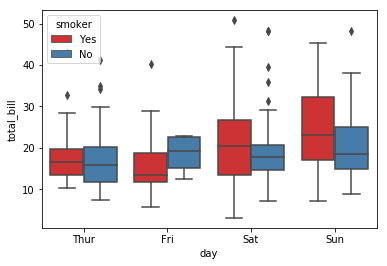

In [9]:
import seaborn as sns
df = sns.load_dataset('tips')
 
# Grouped boxplot
sns.boxplot(x="day", y="total_bill", hue="smoker", data=df, palette="Set1")
#sns.plt.show()


In [10]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
